In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# genes are features/ columns
# wt, ko are the samples/ rows/ leaf
# genes are in row
# wt followed by ko are sample represented as columns

In [24]:
data = pd.read_csv("basil_dataset.csv")

indexs = data["label"]

data = data.drop(["category", "image_name", "label"], axis = 1)

for i in range(7, len(data.columns)):
    col = data.columns[i]

    content_list = [] 
    for content in data[col]:
        content = float(content[4: len(content) - 1])
        content_list.append(content)

    data[col] = pd.DataFrame(content_list)
        

data.head()

,green_color,brown_color,green_to_brown_ratio,perimeter_to_area_ratio,solidity,roundness,aspect_ratio,corr_1,dis_sim_1,homogen_1,...,corr_5,dis_sim_5,homogen_5,contrast_5,energy_5,corr_6,dis_sim_6,homogen_6,contrast_6,energy_6
0,2.066458,0.494136,4.181965,0.025388,0.864022,0.156837,1.532847,0.991155,1.040234,0.808449,...,0.969483,2.320747,0.756454,104.026823,0.684005,0.944653,3.464212,0.737449,189.394100,0.679623
1,4.240871,2.100950,2.018550,0.033033,0.912588,0.137574,1.828257,0.986440,0.821381,0.864660,...,0.955035,2.000742,0.827913,96.156091,0.785804,0.921941,3.001918,0.814722,167.736180,0.782390
2,0.000000,1.890563,0.000000,0.028565,0.916065,0.144819,1.727595,0.988639,0.886429,0.848490,...,0.957890,2.420038,0.788751,112.165658,0.729180,0.917281,4.132318,0.766081,221.288339,0.724933
3,59.205965,0.000000,0.000000,0.037495,0.916482,0.163614,1.156194,0.982857,0.264862,0.951205,...,0.957897,0.589430,0.920867,27.277081,0.860289,0.927780,0.976415,0.904566,47.041172,0.857848
4,52.398090,0.000000,0.000000,0.026012,0.931384,0.140640,1.136608,0.985517,1.431631,0.768274,...,0.952603,3.266384,0.718425,103.411587,0.666671,0.921935,4.480821,0.702661,170.947475,0.662309


In [25]:
data.shape

(928, 37)

In [26]:
# it centers and scales the data, both with single function
scaled_data = preprocessing.scale(data)

In [27]:
scaled_data.shape

(928, 37)

In [28]:
pca = PCA()
# this is where we calculate stuff
# i.e. loading data and variation for each principle component 
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

37


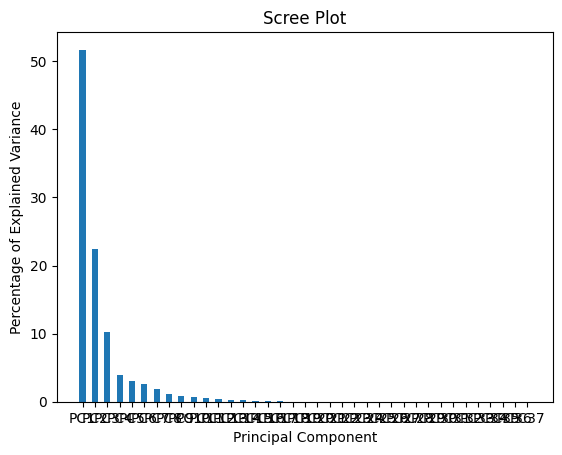

In [29]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
print(len(per_var))

labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), width=0.5, height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [31]:
for i in range(len(indexs)):
    indexs[i] = indexs[i] + f"{i}"

indexs

0              downy_mildew0
1              downy_mildew1
2              downy_mildew2
3              downy_mildew3
4              downy_mildew4
               ...          
923    septoria_leaf_spot923
924    septoria_leaf_spot924
925    septoria_leaf_spot925
926    septoria_leaf_spot926
927    septoria_leaf_spot927
Name: label, Length: 928, dtype: object

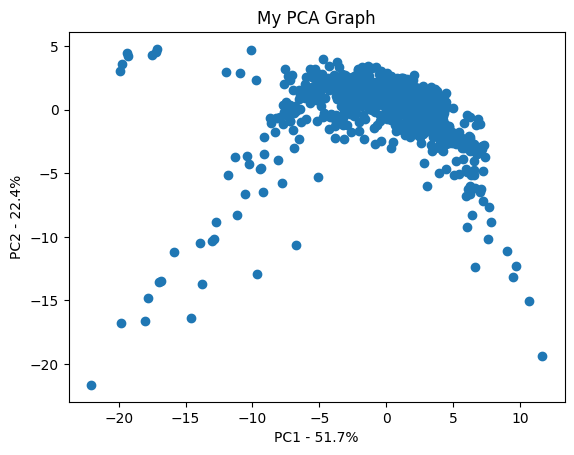

In [34]:
pca_df = pd.DataFrame(pca_data, index=[*indexs], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [41]:
loading_scores = pd.Series(pca.components_[0], index=data.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_features = sorted_loading_scores[0: 25].index.values

print(loading_scores[top_10_features])

homogen_4                  0.215450
homogen_1                  0.215271
homogen_5                  0.213450
homogen_2                  0.213274
homogen_3                  0.212085
homogen_6                  0.211788
dis_sim_6                 -0.209718
dis_sim_3                 -0.204689
energy_3                   0.203743
energy_6                   0.203729
energy_2                   0.203710
energy_5                   0.203710
energy_4                   0.203668
energy_1                   0.203650
dis_sim_5                 -0.203411
dis_sim_2                 -0.200732
dis_sim_4                 -0.194281
dis_sim_1                 -0.188108
contrast_6                -0.164968
contrast_5                -0.161702
perimeter_to_area_ratio    0.155836
contrast_3                -0.154984
contrast_2                -0.154974
contrast_4                -0.152572
contrast_1                -0.141765
dtype: float64
